## Other Benchmarks

In [6]:
import matplotlib.pyplot as plt

import librosa
import numpy as np

def condition_label(wav_array, annot, sr, neg_type=1, condition=0.1):
    if neg_type == 1:
        neg_id = np.where(annot != 1)[0]
        pos_id = np.where(annot == 1)[0]

        base_signal = wav_array.copy()
        neg_signal = wav_array.copy()

        for n in neg_id:
            n_init = int(n * sr / 2)
            base_signal[n_init:int(n_init+sr/2)] = np.nan

        for p in pos_id:
            p_init = int(p * sr / 2)
            neg_signal[p_init:int(p_init+sr/2)] = np.nan

    elif neg_type == 2:
        abs_wav = np.abs(wav_array)
        neg_id = []
        
        ix = 0
        while (ix * 1000 + 999) < len(abs_wav):
            i = ix * 1000
            if (np.sum(abs_wav[i:i+1000]) <= condition):
                neg_id += list(range(i, i+1000))
            
            ix += 1
            
        pos_id = list(set(list(range(len(wav_array)))) - set(neg_id))
        
        base_signal = wav_array.copy()
        neg_signal = wav_array.copy()
        
        base_signal[neg_id] = np.nan
        neg_signal[pos_id] = np.nan
        
    else:
        abs_wav = np.abs(wav_array)
        neg_id = []
        
        ix = 0
        while (ix * 2000 + 1999) < len(abs_wav):
            i = ix * 2000
            if (np.sum(abs_wav[i:i+2000]) <= condition):
                if annot[int(ix / (sr /2))] != 0:
                    neg_id += list(range(i, i+2000))
            
            ix += 1
            
        pos_id = list(set(list(range(len(wav_array)))) - set(neg_id))
        
        base_signal = wav_array.copy()
        neg_signal = wav_array.copy()
        
        base_signal[neg_id] = np.nan
        neg_signal[pos_id] = np.nan
        
    return base_signal, neg_signal

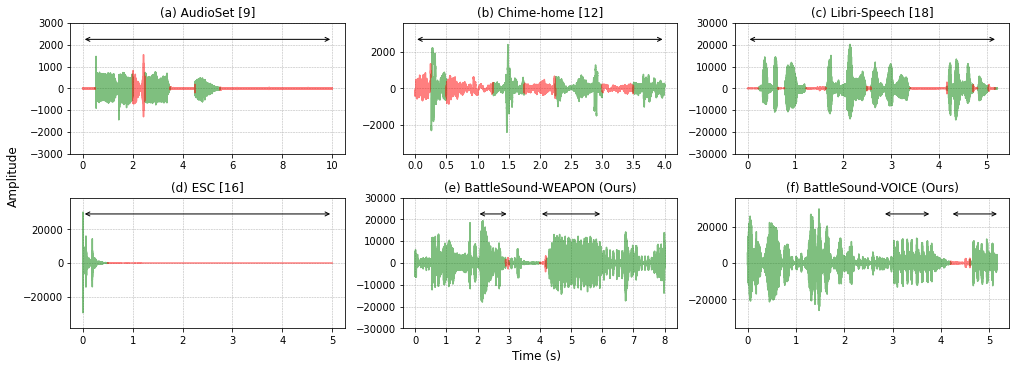

In [7]:
fig, axes = plt.subplots(2,3, figsize=(14,5))

# (a) Audioset
file_name = './samples_benchmarks/audioset.wav'
wav, sr = librosa.load(file_name)

init = sr * 16
wav = wav[init:(init + sr*10)]
t = np.array(list(range(0, len(wav)))) / sr # Time

annot= np.array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

b, n = condition_label(wav, annot, sr)
b *= 30000
n *= 30000
ax = axes.flatten()[0]
ax.plot(t, b, 'g', alpha=0.5)
ax.plot(t, n, 'r', alpha=0.5)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('(a) AudioSet [9]')
ylim = 0.1 * 30000
ax.set_ylim(-ylim, ylim)
ax.annotate("", xy=(len(wav)/sr, ylim*0.75), xytext=(0., ylim*0.75), arrowprops=dict(arrowstyle="<->"))


# (b) Chime-Home
file_name = './samples_benchmarks/chime_home.wav'
wav, sr = librosa.load(file_name)

t = np.array(list(range(0, len(wav)))) / sr # Time

annot= np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

b, n = condition_label(wav, annot, int(sr/2))
b *= 30000
n *= 30000
ax = axes.flatten()[1]
ax.plot(t, b, 'g', alpha=0.5)
ax.plot(t, n, 'r', alpha=0.5)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('(b) Chime-home [12]')
ylim = 0.12 * 30000
ax.set_ylim(-ylim, ylim)
ax.annotate("", xy=(len(wav)/sr, 0.75 * ylim), xytext=(0., 0.75 * ylim), arrowprops=dict(arrowstyle="<->"))


# (c) Libri-speech (5s)
file_name = './samples_benchmarks/librispeech.wav'
wav, sr = librosa.load(file_name)

t = np.array(list(range(0, len(wav)))) / sr # Time

annot= np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])
b, n = condition_label(wav, annot, sr, neg_type=2, condition=10)
b *= 30000
n *= 30000
ax = axes.flatten()[2]
ax.plot(t, b, 'g', alpha=0.5)
ax.plot(t, n, 'r', alpha=0.5)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('(c) Libri-Speech [18]')
ylim = 1.0 * 30000
ax.set_ylim(-ylim, ylim)
ax.annotate("", xy=(len(wav)/sr, 0.75 * ylim), xytext=(0., 0.75 * ylim), arrowprops=dict(arrowstyle="<->"))


# (d) ESC (5s)
file_name = './samples_benchmarks/ESC.wav'
wav, sr = librosa.load(file_name)
t = np.array(list(range(0, len(wav)))) / sr # Time

annot= np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
b, n = condition_label(wav, annot, sr, neg_type=1)
b *= 30000
n *= 30000

ax = axes.flatten()[3]
ax.plot(t, b, 'g', alpha=0.5)
ax.plot(t, n, 'r', alpha=0.5)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('(d) ESC [16]')
ylim = 1.3 * 30000
ax.set_ylim(-ylim, ylim)
ax.annotate("", xy=(len(wav)/sr, ylim * 0.75), xytext=(0., ylim * 0.75), arrowprops=dict(arrowstyle="<->"))


# (e) Battlesound-GUN (0.5s)
file_name = './samples_benchmarks/battlesound_gun.wav'
wav, sr = librosa.load(file_name)
wav = wav[:8*sr]
t = np.array(list(range(0, len(wav)))) / sr # Time

annot= np.load('./samples_benchmarks/battlesound_gun.npy')

b = wav * 30000
n = np.array([np.nan] * len(wav))
n[int(2.9 * sr):int(3.0 * sr)] = b[int(2.9 * sr):int(3.0 * sr)]
b[int(2.9 * sr):int(3.0 * sr)] = np.nan

n[int(4.0 * sr):int(4.2 * sr)] = b[int(4.0 * sr):int(4.2 * sr)]
b[int(4.0 * sr):int(4.2 * sr)] = np.nan

ax = axes.flatten()[4]
ax.plot(t, b, 'g', alpha=0.5)
ax.plot(t, n, 'r', alpha=0.5)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('(e) BattleSound-WEAPON (Ours)')
ylim = 1.0 * 30000
ax.set_ylim(-ylim, ylim)
ax.annotate("", xy=(3.0, ylim * 0.75), xytext=(2.0, ylim * 0.75), arrowprops=dict(arrowstyle="<->"))
ax.annotate("", xy=(6.0, ylim * 0.75), xytext=(4.0, ylim * 0.75), arrowprops=dict(arrowstyle="<->"))


# (f) Battlesound-VOICE (0.5s)
file_name = './samples_benchmarks/battlesound_voice.wav'
wav, sr = librosa.load(file_name)
t = np.array(list(range(0, len(wav)))) / sr # Time

annot= np.load('./samples_benchmarks/battlesound_voice.npy')
b = wav * 30000
n = np.array([np.nan] * len(wav))
n[int(4.2 * sr):int(4.6 * sr)] = b[int(4.2 * sr):int(4.6 * sr)]
b[int(4.2 * sr):int(4.6 * sr)] = np.nan

ax = axes.flatten()[5]
ax.plot(t, b, 'g', alpha=0.5)
ax.plot(t, n, 'r', alpha=0.5)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('(f) BattleSound-VOICE (Ours)')

ylim = 1.2 * 30000
ax.set_ylim(-ylim, ylim)
ax.annotate("", xy=(3.8, ylim * 0.75), xytext=(2.8, ylim * 0.75), arrowprops=dict(arrowstyle="<->"))
ax.annotate("", xy=(5.2, ylim * 0.75), xytext=(4.2, ylim * 0.75), arrowprops=dict(arrowstyle="<->"))
            
fig.set_facecolor('w')

fig.text(0.5+0.02, -0.01, 'Time (s)', ha='center', fontsize=12)
fig.text(-0.005, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=12)

plt.tight_layout()

## Intra-class Variations

C:\Users\hogil\AppData\Local\Temp/ipykernel_1480/164439076.py:8: WavFileWarning: Reached EOF prematurely; finished at 40804431 bytes, expected 4294967303 bytes from header.
  sr, wav = read(file_name)


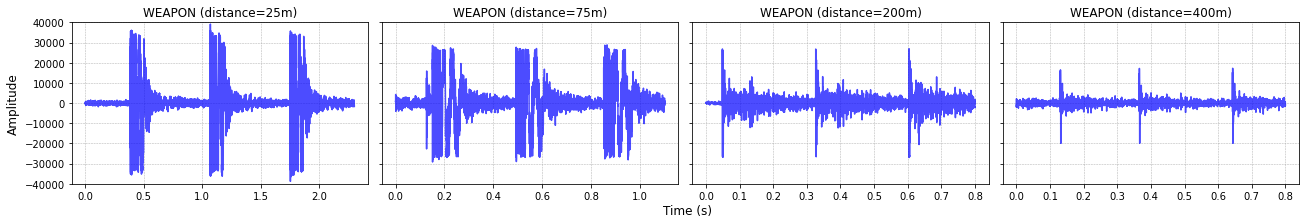

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
import librosa

# Load a WAV file
file_name = './samples_dist/distance_gun.wav'
sr, wav = read(file_name)
wav = wav.astype('float')
wav = wav[:, 0]

# Resample
wav = librosa.resample(wav, sr, target_sr=16000)
sr = 16000

color = 'blue'
alpha = 0.7

# Plot
fig, axes = plt.subplots(1,4, figsize=(18,3))

start = 37
wav_4 = wav[start* sr : int((start+2.3) * sr)]
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[0]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_ylim(-40000, 40000)
ax.set_title('WEAPON (distance=25m)')

start = 48
wav_4 = wav[int(start* sr) : int((start+1.1) * sr)] * 0.8
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[1]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_ylim(-40000, 40000)
ax.set_yticklabels([])
ax.set_title('WEAPON (distance=75m)')


start = 93.8
wav_4 = wav[int(start* sr) : int((start+0.8) * sr)] * 0.8
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[2]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_ylim(-40000, 40000)
ax.set_yticklabels([])
ax.set_title('WEAPON (distance=200m)')


start = 116
wav_4 = wav[int(start* sr) : int((start+0.8) * sr)] * 0.6
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[3]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_ylim(-40000, 40000)
ax.set_yticklabels([])
ax.set_title('WEAPON (distance=400m)')


# Total
fig.set_facecolor('w')
fig.text(0.5+0.02, -0.01, 'Time (s)', ha='center', fontsize=12)
fig.text(-0.005, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=12)

# Total Axis
# fig.text(0.5+0.02, -0.04, '(a) WEAPON sound depending on the distance', ha='center', fontsize=12)
plt.tight_layout() 



C:\Users\hogil\AppData\Local\Temp/ipykernel_1480/2462592302.py:8: WavFileWarning: Reached EOF prematurely; finished at 256671823 bytes, expected 4294967303 bytes from header.
  sr, wav = read(file_name)


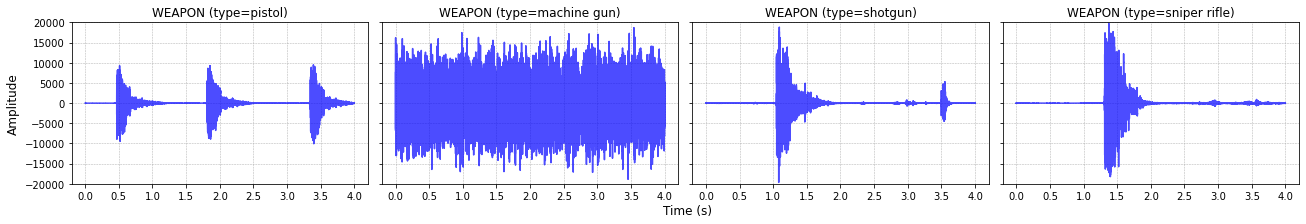

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
import librosa

# Load WAV file for gun kind
file_name = './samples_kind/gun_kind.wav'
sr, wav = read(file_name)
wav = wav.astype('float')
wav = wav[:, 0]

# Resample
wav = librosa.resample(wav, sr, target_sr=16000)
sr = 16000

fig, axes = plt.subplots(1,4, figsize=(18,3))
color = 'blue'
alpha = 0.7

# Kind 1
start = 1 * 60 + 11.5
wav_4 = wav[int(start* sr) : int((start+4) * sr)] * 0.8
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[0]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_ylim(-20000, 20000)
ax.set_title('WEAPON (type=pistol)')

# Kind 2
start = 6 * 60 + 8
wav_4 = wav[int(start* sr) : int((start+4) * sr)]
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[1]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_yticklabels([])
ax.set_ylim(-20000, 20000)
ax.set_title('WEAPON (type=machine gun)')

# Kind 3
start = 22 * 60 + 56
wav_4 = wav[int(start* sr) : int((start+4) * sr)]
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[2]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_yticklabels([])
ax.set_ylim(-20000, 20000)
ax.set_title('WEAPON (type=shotgun)')


# Kind 4
start = 14 * 60 + 6
wav_4 = wav[int(start* sr) : int((start+4) * sr)]
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[3]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_yticklabels([])
ax.set_ylim(-20000, 20000)
ax.set_title('WEAPON (type=sniper rifle)')


# Total
fig.set_facecolor('w')
fig.text(0.5+0.02, -0.01, 'Time (s)', ha='center', fontsize=12)
fig.text(-0.005, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=12)

# Total Axis
# fig.text(0.5+0.02, -0.04, '(a) WEAPON sound depending on the distance', ha='center', fontsize=12)
plt.tight_layout() 

C:\Users\hogil\AppData\Local\Temp/ipykernel_1480/190173120.py:8: WavFileWarning: Reached EOF prematurely; finished at 21651535 bytes, expected 4294967303 bytes from header.
  sr, wav = read(file_name)


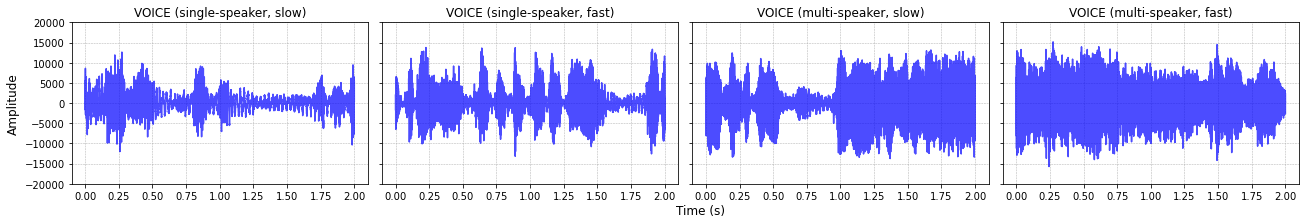

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
import librosa

# Load WAV file for voice
file_name = './samples_voice/voice.wav'
sr, wav = read(file_name)
wav = wav.astype('float')
wav = wav[:, 0]

# Resample
wav = librosa.resample(wav, sr, target_sr=16000)
sr = 16000
fig, axes = plt.subplots(1,4, figsize=(18,3))

color = 'blue'
alpha = 0.7

# Single Speaker
start = 0 * 60 + 18
wav_4 = wav[int(start* sr) : int((start+2) * sr)] * 5
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[0]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('VOICE (single-speaker, slow)')
ax.set_ylim(-20000, 20000)


# Single Speaker
start = 0 * 60 + 35
wav_4 = wav[int(start* sr) : int((start+2) * sr)] * 3
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[1]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('VOICE (single-speaker, fast)')
ax.set_ylim(-20000, 20000)
ax.set_yticklabels([])


# Multi-speaker
start = 0 * 60 + 26
wav_4 = wav[int(start* sr) : int((start+2) * sr)] * 3
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[2]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('VOICE (multi-speaker, slow)')
ax.set_ylim(-20000, 20000)
ax.set_yticklabels([])


# Multi-speaker
start = 0 * 60 + 58
wav_4 = wav[int(start* sr) : int((start+2) * sr)]
t4 = np.array(list(range(0, len(wav_4)))) / sr

ax = axes.flatten()[3]
ax.plot(t4, wav_4, color=color, alpha=alpha)
ax.grid(True, linewidth= 0.5, linestyle="--")
ax.set_title('VOICE (multi-speaker, fast)')
ax.set_ylim(-20000, 20000)
ax.set_yticklabels([])


# Total
fig.set_facecolor('w')
fig.text(0.5+0.03, -0.01, 'Time (s)', ha='center', fontsize=12)
fig.text(-0.005, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=12)

# Total Axis
# fig.text(0.5+0.02, -0.04, '(a) WEAPON sound depending on the distance', ha='center', fontsize=12)
plt.tight_layout() 

## Data Statistics

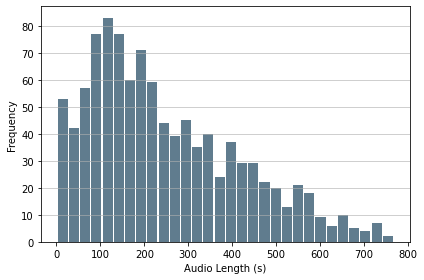

In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open('stat.pkl', 'rb') as f:
    data = pickle.load(f)

# example data
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(data, bins=30, rwidth=0.9, color='#607c8e')


# add a 'best fit' line
ax.set_xlabel('Audio Length (s)')
ax.set_ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## Voice Samples Representations

In [3]:

from glob import glob
import numpy as np

voice_list = glob('../sample/voice/*.npz')

ind_list_0, ind_list_1 = [], []
for ix in range(20):
    voice = dict(np.load(voice_list[ix]))
    
    for ix2 in range(len(voice['label'])):
        if voice['label'][ix2] == 0:
            ind_list_0.append((ix, ix2))
        elif voice['label'][ix2] == 1: 
            ind_list_1.append((ix, ix2))
        else:
            pass
        
# Index
id, ix = ind_list_1[0]

# Samples
voice = dict(np.load(voice_list[id]))
wav = voice['audio'][ix]
wav_voice = wav.astype('float')

IndexError: list index out of range

In [2]:
from glob import glob
import numpy as np

voice_list = glob('../sample/voice/*.npz')

ind_list_0, ind_list_1 = [], []
for ix in range(20):
    voice = dict(np.load(voice_list[ix]))
    
    for ix2 in range(len(voice['label'])):
        if voice['label'][ix2] == 0:
            ind_list_0.append((ix, ix2))
        elif voice['label'][ix2] == 1: 
            ind_list_1.append((ix, ix2))
        else:
            pass
        
# Index
id, ix = ind_list_1[0]

# Samples
voice = dict(np.load(voice_list[id]))
wav = voice['audio'][ix]
wav_voice = wav.astype('float')

IndexError: list index out of range

In [1]:
from glob import glob
from collections import defaultdict
import numpy as np
data_list = glob('/data/sung/dataset/dongwoon/val/*.npz')
output = defaultdict(list)

for id, data in enumerate(data_list):
    data = dict(np.load(data))
    for ix in range(len(data['label'])):
        output[data['label'][ix]].append((id, ix))
        
    if id == 200:
        break
    

wav_voice = dict(np.load(data_list[output[0][3][0]]))['audio'][output[0][3][1]*8000 : (output[0][3][1]+1)*8000].astype('float')
wav_gun = dict(np.load(data_list[output[1][4][0]]))['audio'][output[1][4][1]*8000 : (output[1][4][1]+1)*8000].astype('float') 
wav_mix = dict(np.load(data_list[output[2][3][0]]))['audio'][output[2][3][1]*8000 : (output[2][3][1]+1)*8000].astype('float')
wav_others = dict(np.load(data_list[output[3][3][0]]))['audio'][output[3][3][1]*8000 : (output[3][3][1]+1)*8000].astype('float')

/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; supp

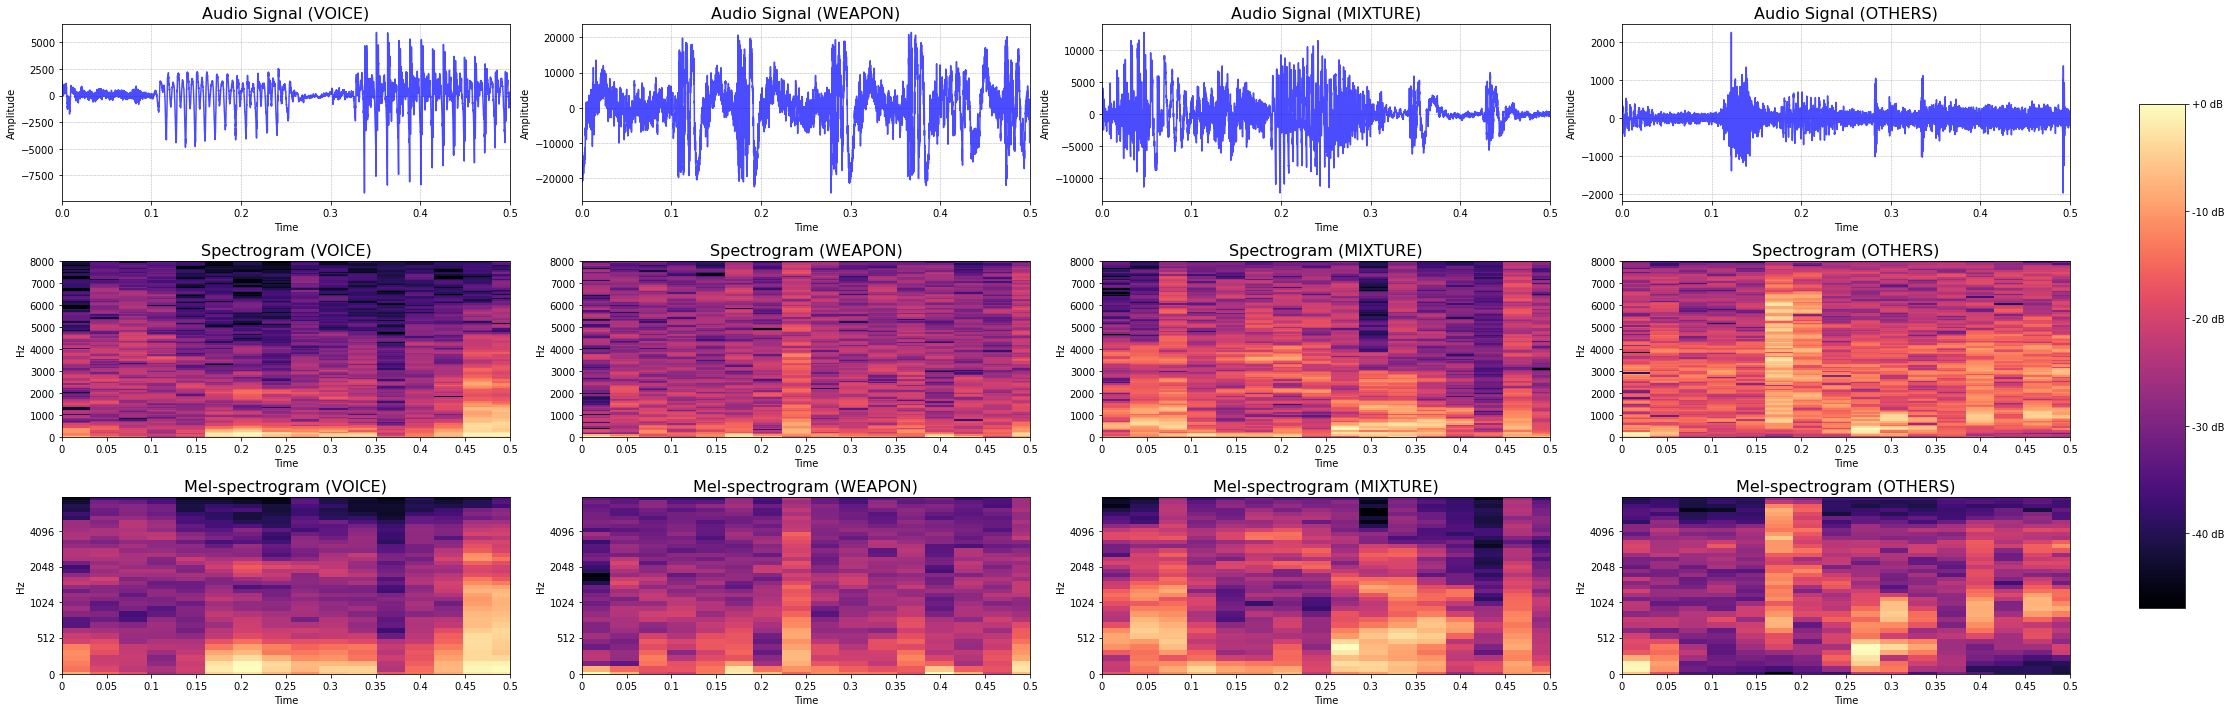

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def sub_figure(wav, sr, axes, ix, title='VOICE', color='#607c8e', alpha=0.8):
    # Visualize Audio Signal
    t = np.array(list(range(0, len(wav)))) / sr

    title_size = 16
    
    ax = axes.flatten()[ix]
    ax.plot(t, wav, color='blue', alpha=0.7)
    ax.grid(True, linewidth= 0.5, linestyle="--")
    ax.set_title('Audio Signal (%s)' %title, fontsize=title_size)
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('Time')
    ax.set_xlim(0.0, 0.5)
    
    # Visualize Spec
    D = librosa.stft(wav, n_fft=256, hop_length=400, win_length=200)  # STFT of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    ax = axes.flatten()[ix+4]
    img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', sr=sr, fmax=8000, ax=ax)
    ax.set_xlim(0.0, 0.5)
    ax.set_title('Spectrogram (%s)' %title, fontsize=title_size)
    
    # Visualize Mel Spec
    S = librosa.feature.melspectrogram(y=wav, sr=sr, n_mels=40, n_fft=256, hop_length=400, win_length=200)
    S_dB = librosa.power_to_db(S, ref=np.max)
    ax = axes.flatten()[ix+8]
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
    ax.set_xlim(0.0, 0.5)    
    ax.set_title('Mel-spectrogram (%s)' %title, fontsize=title_size)
    
    return img

sr = 16000 

color = '#607c8e'

fig, axes = plt.subplots(3,4, figsize=(32,10))
sub_figure(wav_voice, sr, axes, ix=0, title='VOICE', color=color)
sub_figure(wav_gun, sr, axes, ix=1, title='WEAPON', color=color)
sub_figure(wav_mix, sr, axes, ix=2, title='MIXTURE', color=color)
img = sub_figure(wav_others, sr, axes, ix=3, title='OTHERS', color=color)
plt.tight_layout()

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
fig.colorbar(img, cax=cbar_ax, format='%+2.0f dB')
